# Background

- **Author**: `<林宜萱>`
- **Created At**: `<2025-10-30>`
- **Research Motivation and Context (why are we interested in the findings?)：**
本研究旨在分析遊戲在不同時間點的折扣幅度變化，並探討其與遊戲特徵（如年齡、好評率、是否支援多人模式）及成長變數（如粉絲數變化）之間的關係。透過統計圖表與回歸模型的整合，希望揭示影響折扣率的重要因素，進而理解遊戲市場的價格運作邏輯。
- **Main Findings and Takeaways：**  
    - 折扣幅度整體呈現穩定：分析結果顯示折扣活動在特定時期（例如大型促銷季）集中，折扣幅度於年度中有明顯高峰。

    - 多人遊戲與固定折扣機制具顯著影響：多人遊戲平均折扣率較高。

    - 相關係數熱圖揭示共線性現象：部分變數間存在高相關性（如不同週期的成長率），需於模型中謹慎處理以避免過度解釋。

    綜合來看，遊戲折扣幅度受到多重因素交互影響，特別是市場反應變數，是最主要的解釋來源。
- **Future Direciton：**
    - 納入更多動態變數：如近期遊戲上架數量、評論變化速率、促銷活動期間等，以提升模型對折扣時機的預測力。

    - 建立時間序列預測模型：預測不同遊戲的折扣周期性變化。

    - 比較不同遊戲類型或發行商之間的差異：分析不同遊戲類型或發行商在折扣策略上的差異。

    - 結合機器學習模型進行折扣預測：例如利用 Random Forest 或 XGBoost 模型預測折扣率，以驗證變數重要性並提升實務應用價值。

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from IPython.display import HTML

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  
plt.rcParams['axes.unicode_minus'] = False  


plt.style.use("seaborn-v0_8-whitegrid")
sns.set(font_scale=1.1)


In [2]:
df = pd.read_csv('../data/processed/extent-of-discount-rate-DE.csv')
df.head(10)

,Date,GameID,Type,MultiPlayer,Publisher,ConstantDiscount,DiscountRate,DiscountDuration,Age,AccumulatedPositiveRate,...,PlayerGrowthRate2W,PlayerGrowthRate1M,FollowersGrowthRate1W,FollowersGrowthRate2W,FollowersGrowthRate1M,PositiveRateGrowthRate1W,PositiveRateGrowthRate2W,PositiveRateGrowthRate1M,DLC_since_last_discount,Sequel_since_last_discount
0,2023/6/29,10,Action,1,Valve,0,0.903226,14,22.671233,0.975168,...,-0.033624,-0.037584,0.000673,0.001362,0.003116,0.000053,0.000015,0.000023,0,0
1,2023/9/12,10,Action,1,Valve,0,0.903226,7,22.876712,0.974990,...,0.022963,0.003837,0.000553,0.001087,0.002301,0.000004,0.000031,-0.000026,0,0
2,2023/11/21,10,Action,1,Valve,0,0.903226,7,23.068493,0.974686,...,-0.039165,0.015256,0.001381,0.002082,0.004059,-0.000146,-0.000165,-0.000152,0,0
3,2023/12/21,10,Action,1,Valve,0,0.897849,14,23.150685,0.974675,...,-0.033895,-0.006214,0.000790,0.001743,0.004781,0.000016,0.000014,-0.000012,0,0
4,2024/3/14,10,Action,1,Valve,0,0.903226,7,23.380822,0.974604,...,0.044649,0.012697,0.000952,0.001814,0.003629,0.000002,-0.000022,-0.000005,0,0
5,2024/6/27,10,Action,1,Valve,0,0.903226,14,23.668493,0.974511,...,-0.063312,0.025032,0.000744,0.001476,0.002994,-0.000007,0.000012,-0.000059,0,0
6,2024/11/27,10,Action,1,Valve,0,0.801075,7,24.087671,0.974273,...,0.028233,0.007734,0.001202,0.002417,0.004475,-0.000018,-0.000001,-0.000027,0,0
7,2024/12/19,10,Action,1,Valve,0,0.801075,14,24.147945,0.974334,...,0.044363,0.071397,0.000920,0.001795,0.005306,-0.000027,-0.000019,0.000042,0,0
8,2025/3/13,10,Action,1,Valve,0,0.801075,7,24.378082,0.974370,...,-0.092684,-0.085772,0.000899,0.001986,0.004205,0.000011,0.000018,-0.000009,0,0
9,2025/6/26,10,Action,1,Valve,0,0.801075,14,24.665753,0.974255,...,-0.100245,-0.053586,0.000823,0.001505,0.003369,-0.000006,-0.000016,-0.000076,0,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GameID,409.0,497223.716381,297538.620152,10.000000,244850.000000,477160.000000,644930.000000,1.145360e+06
MultiPlayer,409.0,0.503667,0.500599,0.000000,0.000000,1.000000,1.000000,1.000000e+00
ConstantDiscount,409.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
DiscountRate,409.0,0.572639,0.193898,0.034301,0.500000,0.600457,0.701005,1.000000e+00
DiscountDuration,409.0,11.222494,5.299545,1.000000,7.000000,11.000000,14.000000,3.200000e+01
Age,409.0,7.025569,3.988664,2.501370,4.723288,6.027397,7.961644,2.466575e+01
AccumulatedPositiveRate,409.0,0.917436,0.065307,0.738856,0.885042,0.946994,0.967883,9.926429e-01
SalePeriod,409.0,0.415648,0.493437,0.000000,0.000000,0.000000,1.000000,1.000000e+00
PlayerGrowthRate1W,409.0,-0.030744,0.115158,-0.478403,-0.079700,-0.030970,0.011686,6.816883e-01
PlayerGrowthRate2W,409.0,-0.043624,0.193279,-0.721785,-0.134295,-0.054616,0.015807,1.277467e+00


Definition for each variable:  
    - `Date`: datetime，當次折扣首日。  
    - `GameID`: object，該遊戲 unique 的 ID。  
    - `Type`: object，該遊戲的類型。  
    - `MultiPlayer`: int，該遊戲是否屬多人遊戲。  
    - `Publisher`: object，該遊戲的出版商名稱。  
    - `ConstantDiscount`: int，該遊戲的折扣幅度是否固定。（應為 0）  
    - `DiscountRate`: float，當次折扣的幅度，為正表示降價。（應大於 0，表示降價）  
    - `DiscountDuration`: 當次折扣天數。  
    - `Age`: float，折扣當下距該遊戲發布多少年。  
    - `AccumulatedPositiveRate`: float，該遊戲累計至折扣當下的總評價正面率。  
    - `SalePeriod`: int，當次折扣是否位於季節性促銷期間。  
    - `PlayerGrowthRate1W`: float，玩家數一週的移動平均增長率。  
    - `PlayerGrowthRate2W`:float，玩家數兩週的移動平均增長率。  
    - `PlayerGrowthRate1M`: float，玩家數一個月的移動平均增長率。  
    - `FollowersGrowthRate1W`:float，追蹤人數一週的增長率。  
    - `FollowersGrowthRate2W`:float，追蹤人數兩週的增長率。  
    - `FollowersGrowthRate1M`: float，追蹤人數一個月的增長率。  
    - `PositiveRateGrowthRate1W`:float，評價正面率一週的增長率。  
    - `PositiveRateGrowthRate2W`:float，評價正面率兩週的增長率。  
    - `PositiveRateGrowthRate1M`:float，評價正面率一個月的增長率。  
    - `DLC_since_last_discount`:int，截至上一次折扣結束共推出多少新的 DLC。  
    - `Sequel_since_last_discount`:int，截至上一次折扣結束共堆出多少新的續作。  

### The actual analysis starts below
Make the graphs, summary statistics, regression model below.
Make sure you have followed the guidelines as specified in 
[專案資料夾結構、檔案命名與文件規範](https://docs.google.com/document/d/1sl6gEFMdmiGsiNjLe17UmZ30xKxq15U0Mb2B-Jvusxg/edit?tab=t.33iie8ybx7s4).


In [4]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

### A. 折扣幅度整體與時間趨勢

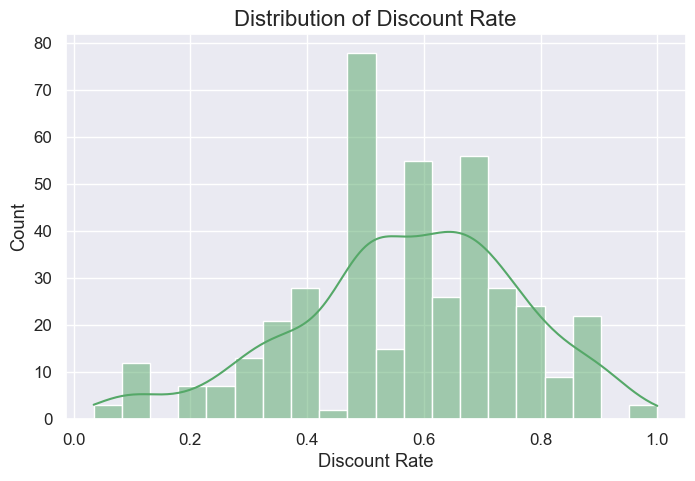

In [5]:
plt.figure(figsize=(8,5))
sns.histplot(df["DiscountRate"], bins=20, kde=True, color="#55A868")
plt.title("Distribution of Discount Rate", fontsize=16)
plt.xlabel("Discount Rate")
plt.ylabel("Count")
plt.show()

- 折扣率在 0.5 左右 出現明顯高峰，顯示半價促銷是最常見的折扣策略。
整體分佈並非完全對稱，可能反映部分遊戲在促銷期間傾向提供更高折扣以刺激銷售。

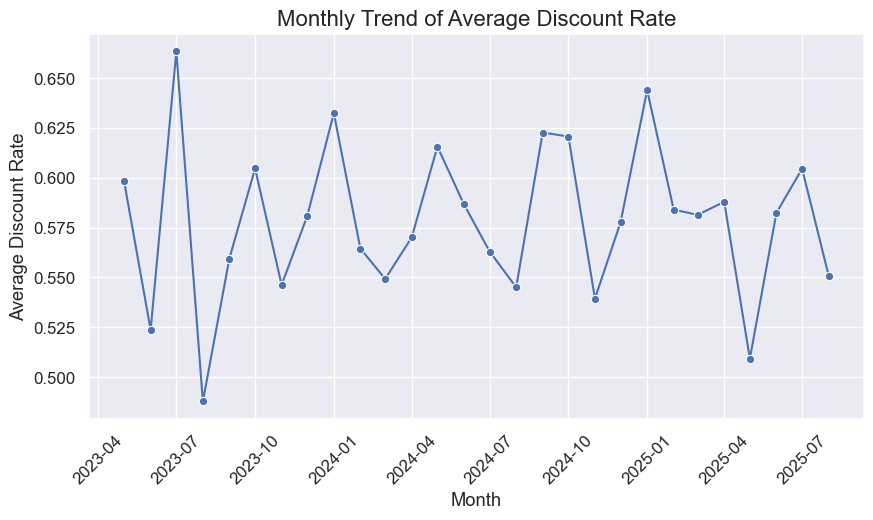

In [6]:
df["Month"] = df["Date"].dt.to_period("M")

# 按月平均折扣率
trend = df.groupby("Month")["DiscountRate"].mean().reset_index()

trend["Month"] = trend["Month"].dt.to_timestamp()

plt.figure(figsize=(10,5))
sns.lineplot(data=trend, x="Month", y="DiscountRate", marker="o", color="#4C72B0")
plt.title("Monthly Trend of Average Discount Rate", fontsize=16)
plt.xlabel("Month")
plt.ylabel("Average Discount Rate")
plt.xticks(rotation=45)
plt.show()


- 整體而言，夏季與冬季為促銷高峰，縣市大部分的遊戲選擇在寒暑假期間做折扣以刺激消費。

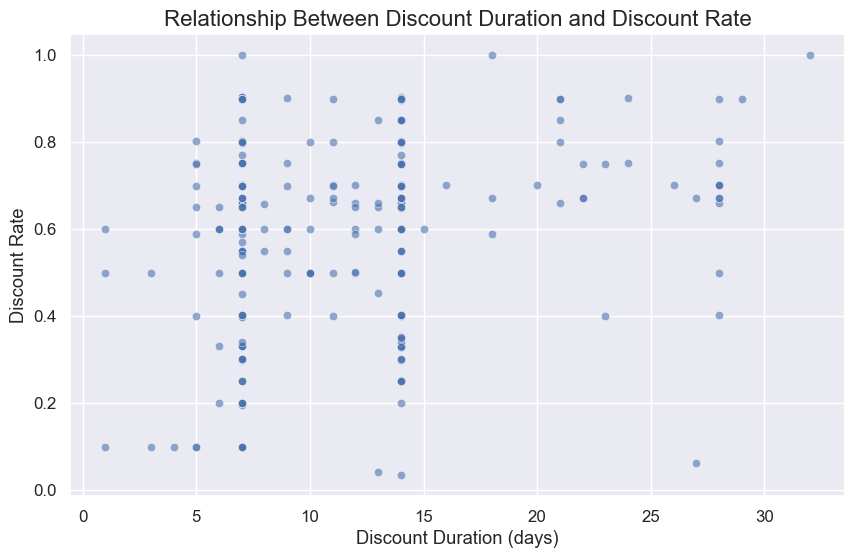

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="DiscountDuration", y="DiscountRate", alpha=0.6, color="#4C72B0")
plt.title("Relationship Between Discount Duration and Discount Rate", fontsize=16)
plt.xlabel("Discount Duration (days)")
plt.ylabel("Discount Rate")
plt.show()


- 整體而言，折扣天數與折扣幅度之間沒有明顯的正或負相關，但可發現:  
    - 折扣天數主要集中在 5、7、14等幾個固定區間，顯示遊戲平台或廠商常採用這些週期作為標準促銷長度（例如週末特賣、一週特賣或月度特賣）。
    - 折扣率分佈在各期間內相對分散，說明不同促銷時段的折扣幅度差異不大，折扣高低主要取決於個別遊戲或行銷策略，而非折扣持續時間。

### B. 遊戲特徵與折扣關係

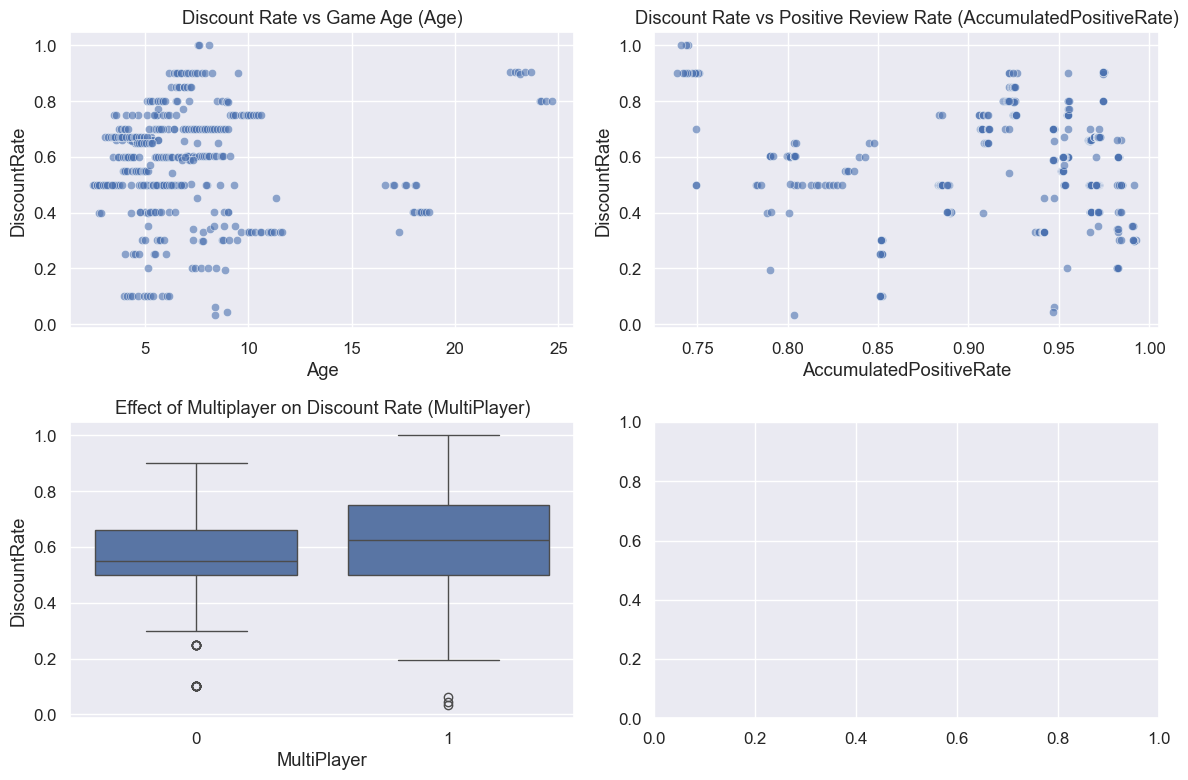

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.scatterplot(ax=axes[0,0], data=df, x="Age", y="DiscountRate", alpha=0.6)
axes[0,0].set_title("Discount Rate vs Game Age (Age)")

sns.scatterplot(ax=axes[0,1], data=df, x="AccumulatedPositiveRate", y="DiscountRate", alpha=0.6)
axes[0,1].set_title("Discount Rate vs Positive Review Rate (AccumulatedPositiveRate)")

sns.boxplot(ax=axes[1,0], data=df, x="MultiPlayer", y="DiscountRate")
axes[1,0].set_title("Effect of Multiplayer on Discount Rate (MultiPlayer)")

plt.tight_layout()
plt.show()

- 較年輕的遊戲(5~10年)，折扣率分布較廣，推測遊戲廠商可能還在測試適合的折扣幅度，反之較年長的遊戲，折扣幅度趨向穩定。  
- 整體的遊戲評價似乎對折扣幅度沒有巨大關聯。
- 多人遊戲略有更高折扣幅度傾向，可能反映社交性產品的行銷策略。

### C. 動態變數與折扣關係

圖例：
- 對角線上的圖（Diagonal）：各變數的分布圖（KDE density plot）
- 對角線下方的散點圖（Scatter plot）：兩兩變數間的關係

變數：
- DiscountRate：折扣幅度
- PlayerGrowthRate1W / 2W / 1M：玩家數量在 1 週、2 週、1 個月內的成長率
- FollowersGrowthRate1W / 2W / 1M：Followers 在不同期間的成長率

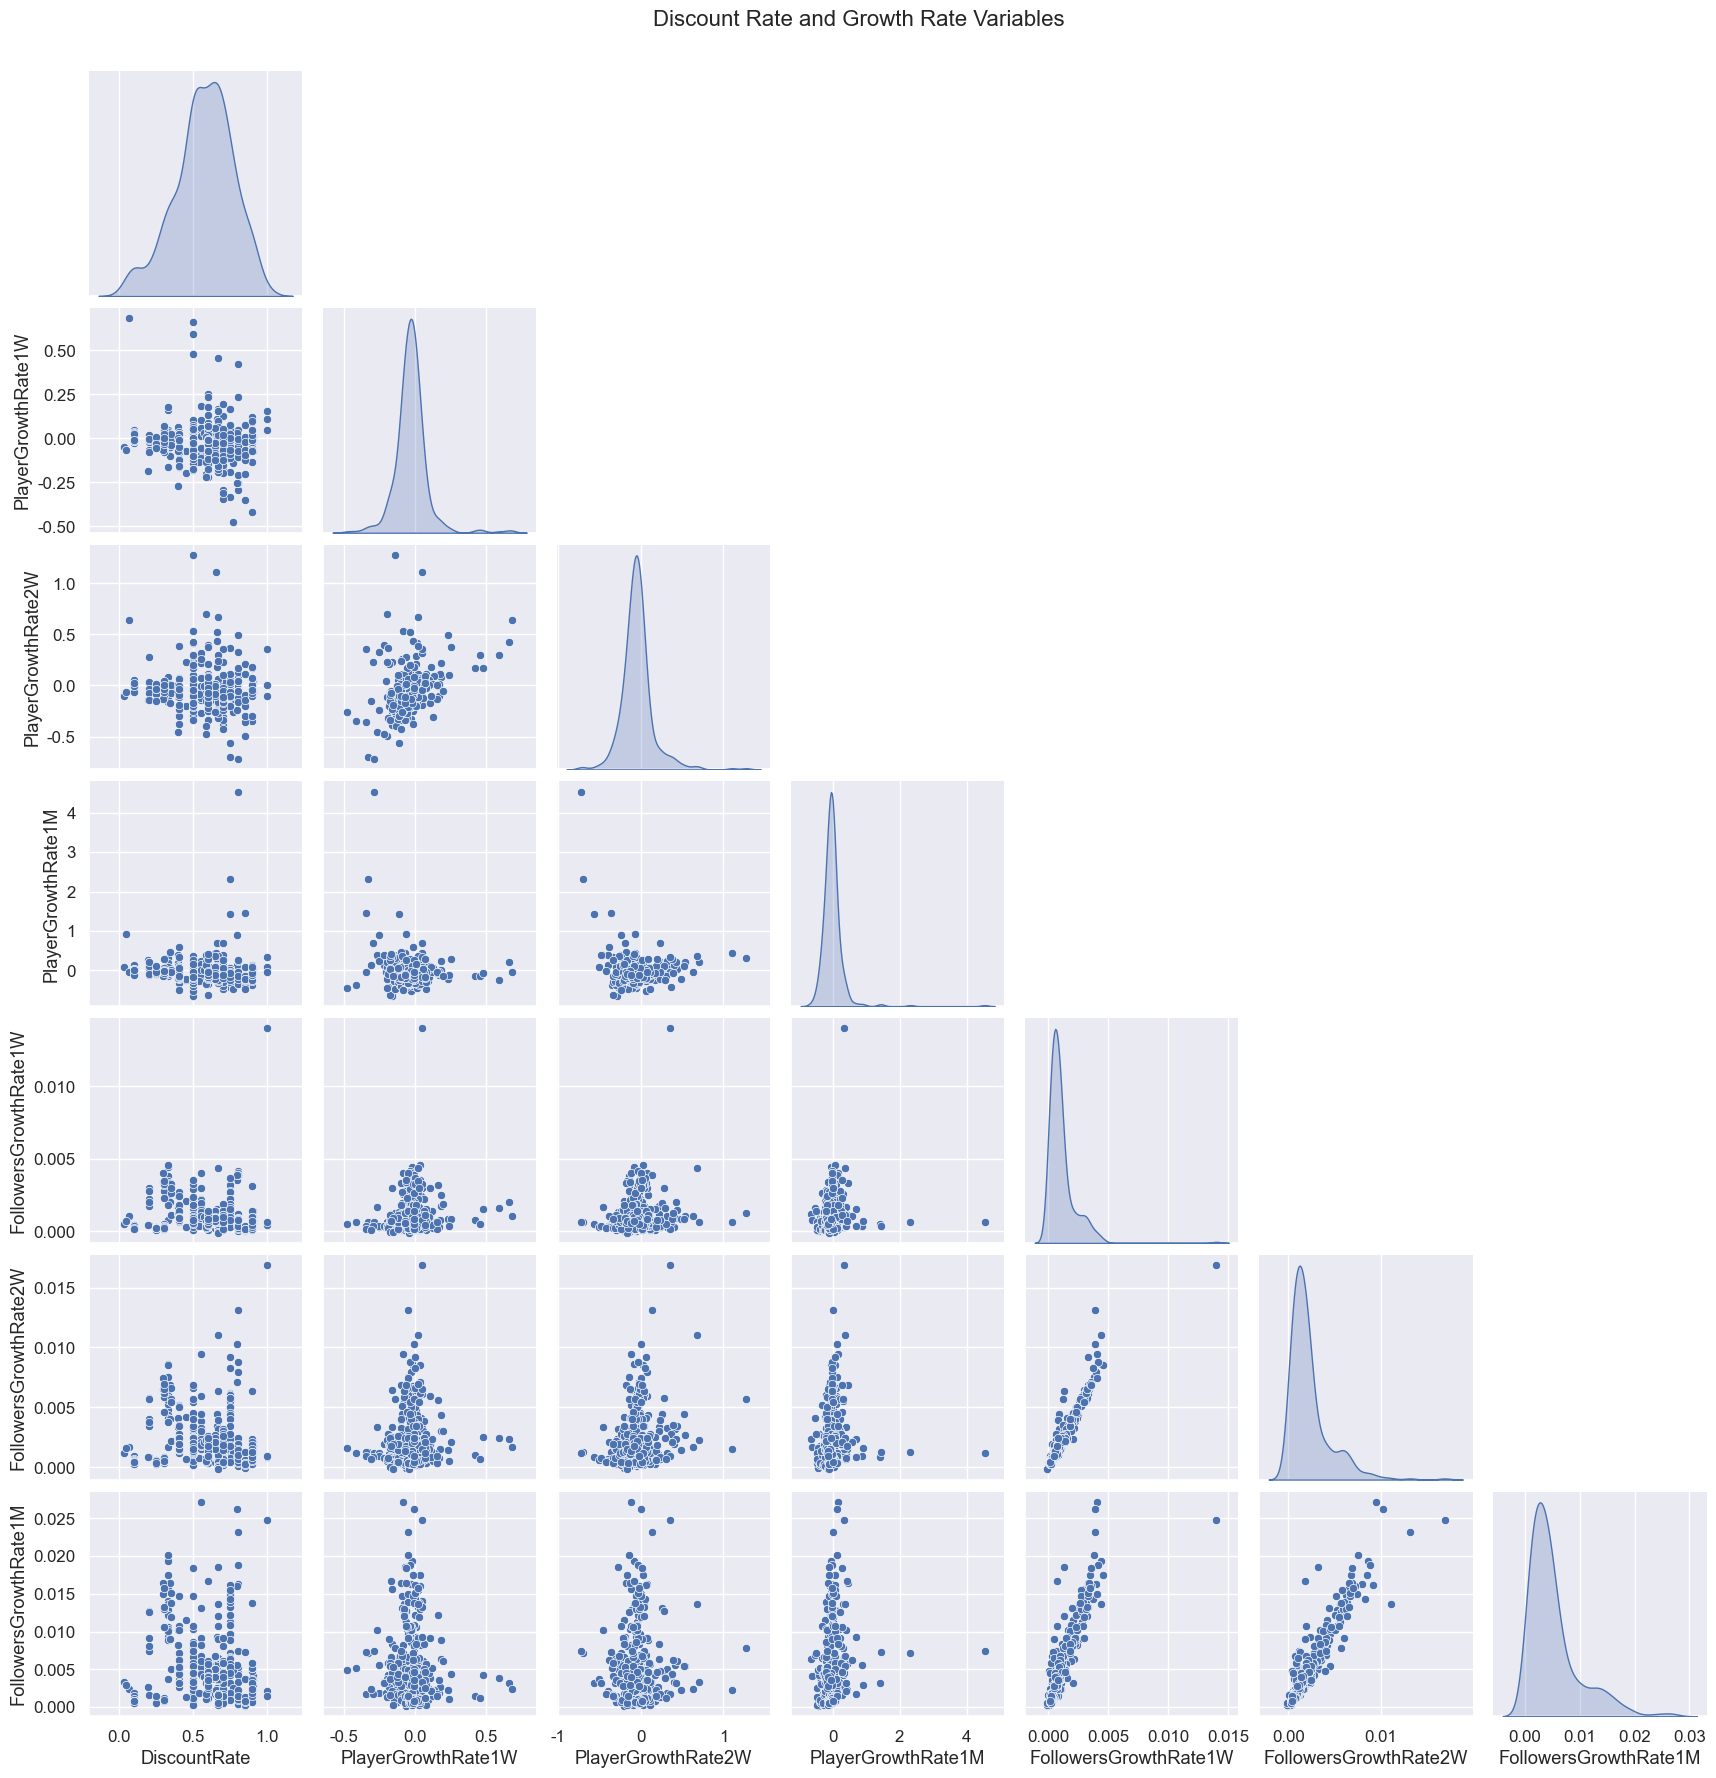

In [32]:
growth_cols = [
    "PlayerGrowthRate1W", "PlayerGrowthRate2W", "PlayerGrowthRate1M",
    "FollowersGrowthRate1W", "FollowersGrowthRate2W", "FollowersGrowthRate1M",
    "PositiveRateGrowthRate1W", "PositiveRateGrowthRate2W", "PositiveRateGrowthRate1M",
]

# 散佈圖矩陣
subset_cols = ["DiscountRate"] + growth_cols[:6]  # 取前幾個主要變數
sns.pairplot(df[subset_cols], diag_kind="kde", corner=True)
plt.suptitle("Discount Rate and Growth Rate Variables", y=1.02, fontsize=16)
plt.show()

1. 折扣率（DiscountRate）與成長率的關係  
- 散布圖顯示折扣率與各類成長率之間的相關性不明顯或偏弱。
- 數據分布相當分散，沒有明顯線性關係。

2. 各成長率變數之間的關聯性  
- 不同期間的成長率（例如 PlayerGrowthRate1W vs 2W, FollowersGrowthRate1W vs 2W）之間顯示出高度正相關。
  這表示成長趨勢具有連續性：若某遊戲在短期內成長迅速，後續幾週的成長速度也通常偏高。
  同時也表示在模型預測時，不應把同類型的成長率同時放入模型做預測。  

3. 分布特性  
- PlayerGrowthRate 各期間的分布偏右（右偏長尾），代表多數遊戲成長率低，只有少數熱門遊戲成長率非常高。  
- FollowersGrowthRate 的分布更為集中且值較小，顯示追隨者成長相對穩定。  


整體而言折扣率對成長率的直接影響有限，沒有明顯的正或負關聯。  
不同成長期間之間存在顯著正相關，成長具持續性。  
整體來看，折扣可能是輔助性的行銷因素，而非主要驅動遊戲成長的關鍵變數。

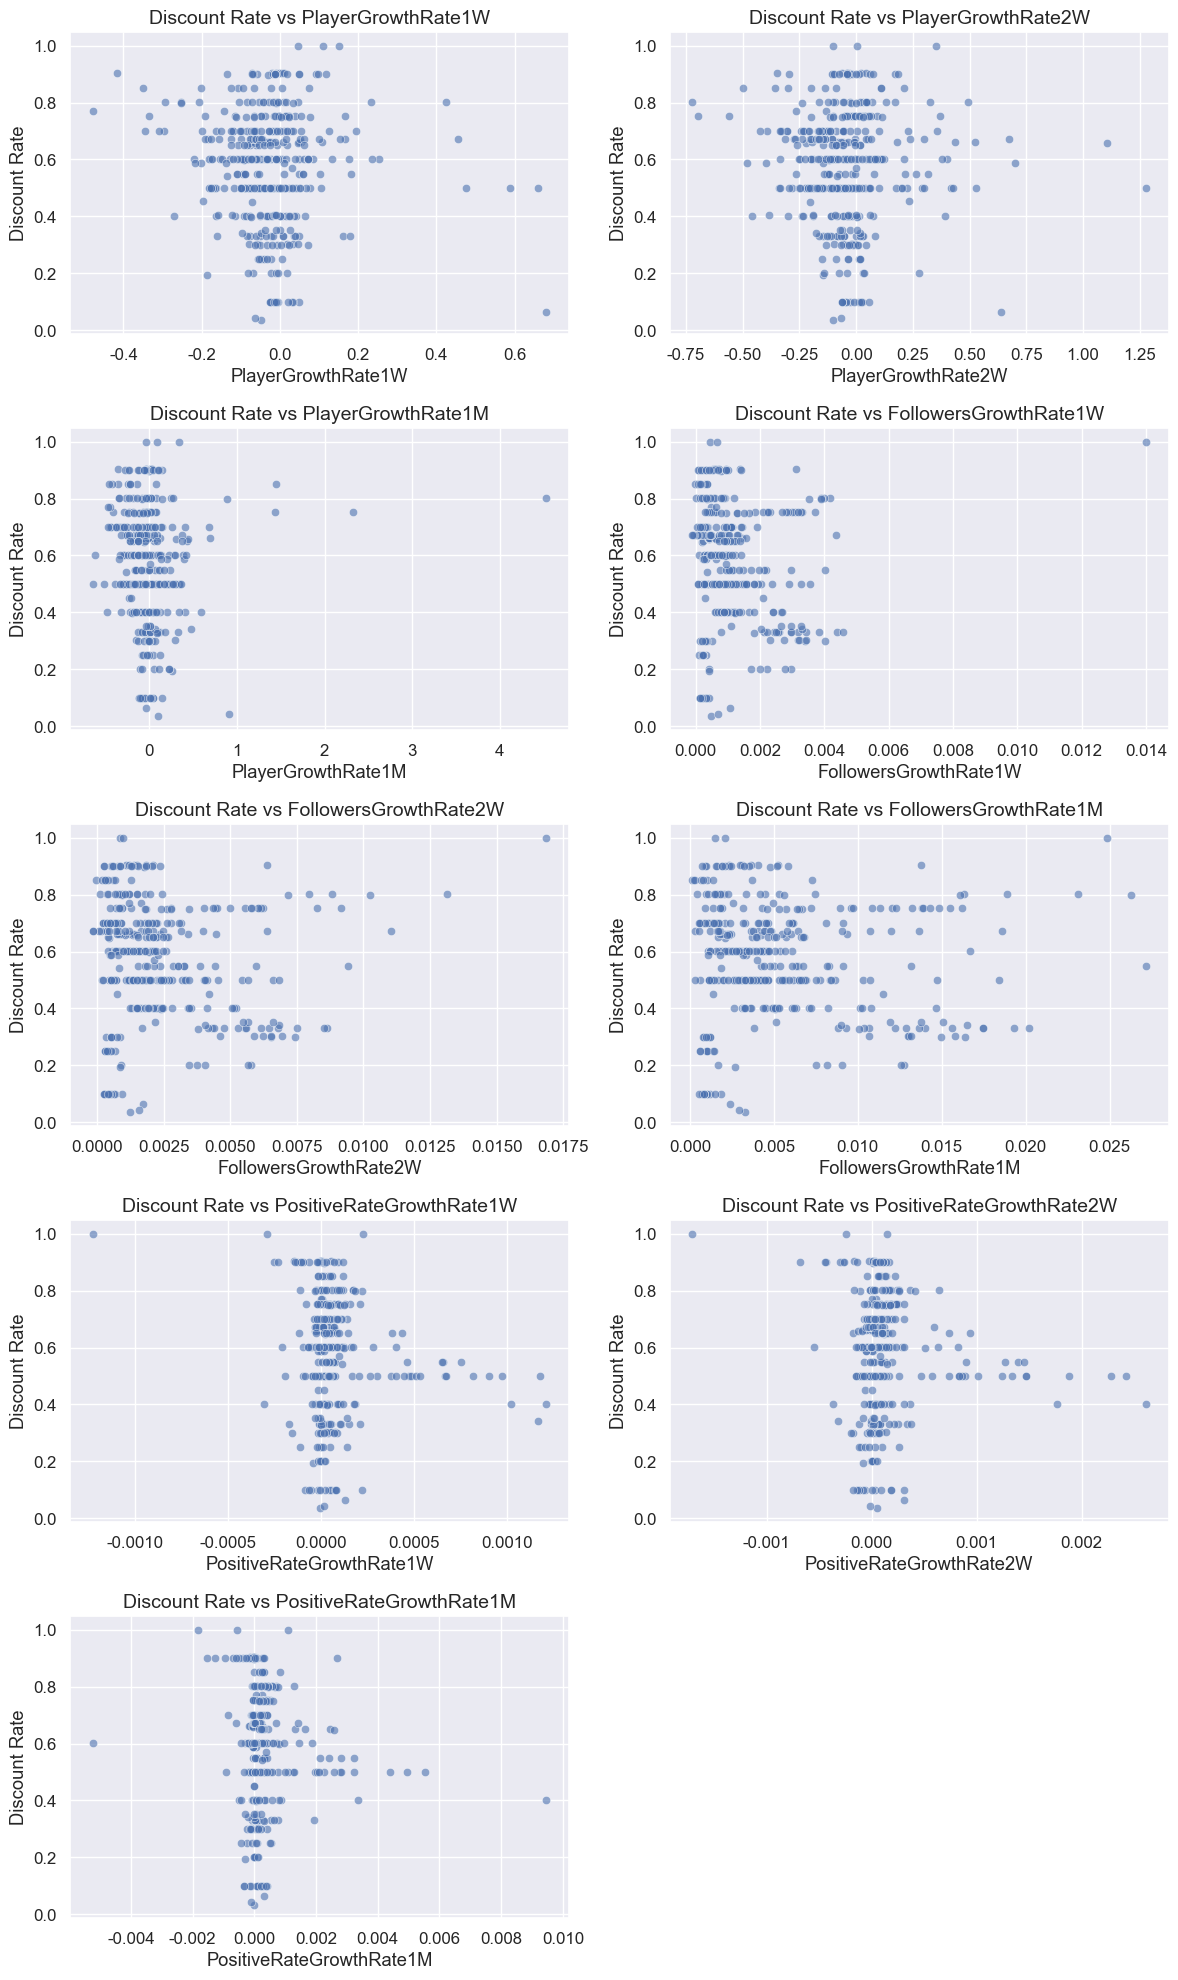

In [33]:
n = len(growth_cols)
rows = math.ceil(n / 2)

fig, axes = plt.subplots(rows, 2, figsize=(12, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(growth_cols):
    sns.scatterplot(data=df, x=col, y="DiscountRate", alpha=0.6, ax=axes[i])
    axes[i].set_title(f"Discount Rate vs {col}", fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Discount Rate")

# 移除多餘的空白子圖（如果變數數量是奇數）
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


### D. 是否為季節性促銷期間 (SalesPeriod)對折扣率與其他變數的影響

從資料中隨機取50筆做 t-test ，分析促銷期間與非促銷期間的兩組樣本，是否存在顯著的差異性。

In [46]:
sample_df = df.sample(n=50, random_state=42)

# 變數清單
vars_to_test = [
    ("DiscountRate", "Discount Rate"),
    ("Age", "Game Age"),
    ("AccumulatedPositiveRate", "Positive Review Rate"),
    ("FollowersGrowthRate1W", "1-Week Follower Growth Rate"),
    ("PlayerGrowthRate1W", "1-Week Player Growth Rate")
]

results = []

for col, label in vars_to_test:
    group0 = sample_df[sample_df["SalePeriod"] == 0][col].dropna()
    group1 = sample_df[sample_df["SalePeriod"] == 1][col].dropna()
    
    n0, n1 = len(group0), len(group1)
    
    if n0 < 2 or n1 < 2:
        results.append({
            "Variable": label,
            "Non-seasonal Mean (SD)": "N/A",
            "Seasonal Mean (SD)": "N/A",
            "Mean Difference": "N/A",
            "p-value": "N/A",
            "n (Non-seasonal)": n0,
            "n (Seasonal)": n1
        })
        continue

    mean0, mean1 = group0.mean(), group1.mean()
    std0, std1 = group0.std(), group1.std()

    # t-test（不假設變異數相等）
    t_stat, p_val = stats.ttest_ind(group0, group1, equal_var=False)

    results.append({
        "Variable": label,
        "Non-seasonal Mean (SD)": f"{mean0:.3f} ({std0:.3f})",
        "Seasonal Mean (SD)": f"{mean1:.3f} ({std1:.3f})",
        "Mean Difference": f"{(mean1 - mean0):.3f}",
        "p-value": f"{p_val:.4f}",
        "n (Non-seasonal)": n0,
        "n (Seasonal)": n1
    })


summary_df = pd.DataFrame(results)


title = "<h3>Table 1. Comparison Between Seasonal and Non-Seasonal Promotions (n=50)</h3>"
HTML(title + summary_df.to_html(index=False))

Variable,Non-seasonal Mean (SD),Seasonal Mean (SD),Mean Difference,p-value,n (Non-seasonal),n (Seasonal)
Discount Rate,0.566 (0.182),0.503 (0.174),-0.063,0.2179,27,23
Game Age,7.418 (4.502),6.928 (4.568),-0.490,0.7052,27,23
Positive Review Rate,0.926 (0.063),0.933 (0.057),0.008,0.6519,27,23
1-Week Follower Growth Rate,0.001 (0.001),0.001 (0.001),0.001,0.0292,27,23
1-Week Player Growth Rate,-0.037 (0.074),-0.031 (0.103),0.006,0.8248,27,23


- 僅有1-Week Follower Growth Rate（追蹤者成長率）具有顯著差異(p = 0.029 < 0.05)，季節促銷期間追蹤者成長率更高。  
- 季節促銷可能帶動社群關注度。即使折扣幅度不高，遊戲曝光與玩家互動仍顯著增加。

C:\Users\user\AppData\Local\Temp\ipykernel_24348\3017797436.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="SalePeriod", y="DiscountRate", palette=["#4C72B0", "#D55E00"])


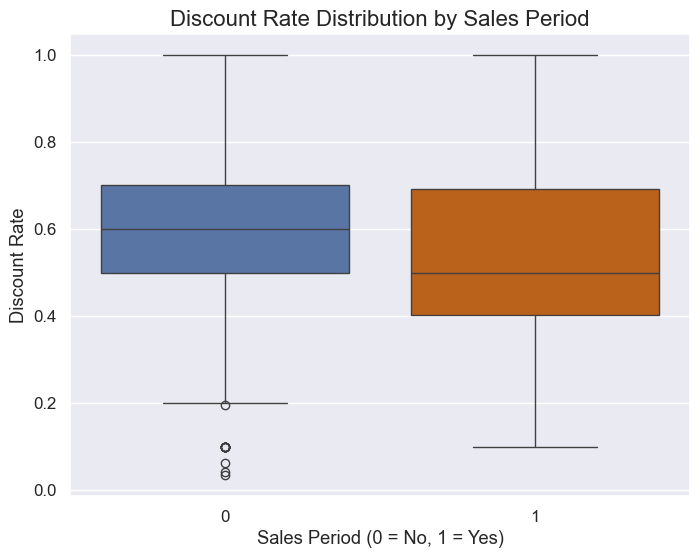

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="SalePeriod", y="DiscountRate", palette=["#4C72B0", "#D55E00"])
plt.title("Discount Rate Distribution by Sales Period", fontsize=16)
plt.xlabel("Sales Period (0 = No, 1 = Yes)")
plt.ylabel("Discount Rate")
plt.show()


- 可發現在非季節性促銷期間，遊戲廠商提供的折扣幅度更大(中位數0.6>0.5)。

C:\Users\user\AppData\Local\Temp\ipykernel_24348\790862086.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\user\AppData\Local\Temp\ipykernel_24348\790862086.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


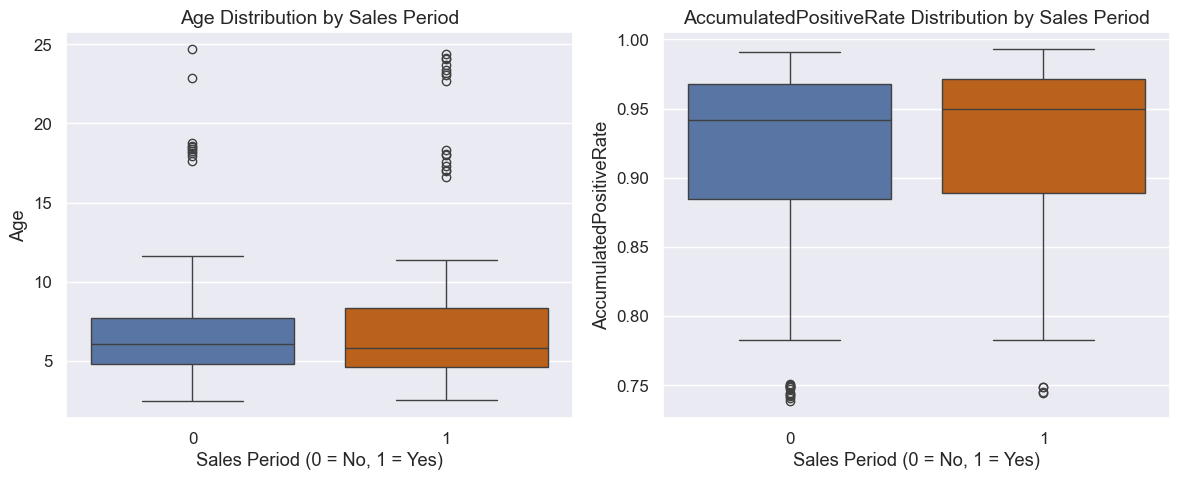

In [20]:
vars_to_compare = ["Age", "AccumulatedPositiveRate"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

# Age
sns.boxplot(
    data=df, x="SalePeriod", y=vars_to_compare[0],
    palette=["#4C72B0", "#D55E00"], ax=axes[0]
)
axes[0].set_title(f"{vars_to_compare[0]} Distribution by Sales Period", fontsize=14)
axes[0].set_xlabel("Sales Period (0 = No, 1 = Yes)")
axes[0].set_ylabel(vars_to_compare[0])

# AccumulatedPositiveRate
sns.boxplot(
    data=df, x="SalePeriod", y=vars_to_compare[1],
    palette=["#4C72B0", "#D55E00"], ax=axes[1]
)
axes[1].set_title(f"{vars_to_compare[1]} Distribution by Sales Period", fontsize=14)
axes[1].set_xlabel("Sales Period (0 = No, 1 = Yes)")
axes[1].set_ylabel(vars_to_compare[1])

plt.tight_layout()
plt.show()



促銷活動對不同發行時長的遊戲影響差異不大，但較老的遊戲仍可能略傾向於在促銷期間出現。  
促銷與否似乎不會顯著影響遊戲的整體評價分布；高評價遊戲在兩種情況下都佔主要比例。

### E. 是否為多人遊戲 (MultiPlayer)對折扣率與其他變數的影響

從資料中隨機取50筆做 t-test ，分析多人遊戲與非多人遊戲的兩組樣本，是否存在顯著的差異性。

In [52]:
sample_df = df.sample(n=50, random_state=42)

# 變數清單
vars_to_test = [
    ("DiscountRate", "Discount Rate"),
    ("Age", "Game Age"),
    ("AccumulatedPositiveRate", "Positive Review Rate"),
    ("FollowersGrowthRate1W", "1-Week Follower Growth Rate"),
    ("PlayerGrowthRate1W", "1-Week Player Growth Rate")
]

results = []

for col, label in vars_to_test:
    group0 = sample_df[sample_df["MultiPlayer"] == 0][col].dropna()
    group1 = sample_df[sample_df["MultiPlayer"] == 1][col].dropna()
    
    n0, n1 = len(group0), len(group1)
    
    if n0 < 2 or n1 < 2:
        results.append({
            "Variable": label,
            "Non-MultiPlayer Mean (SD)": "N/A",
            "MultiPlayer Mean (SD)": "N/A",
            "Mean Difference": "N/A",
            "p-value": "N/A",
            "n (Non-MultiPlayer)": n0,
            "n (MultiPlayer)": n1
        })
        continue

    mean0, mean1 = group0.mean(), group1.mean()
    std0, std1 = group0.std(), group1.std()

    # t-test（不假設變異數相等）
    t_stat, p_val = stats.ttest_ind(group0, group1, equal_var=False)

    results.append({
        "Variable": label,
        "Non-MultiPlayer Mean (SD)": f"{mean0:.3f} ({std0:.3f})",
        "MultiPlayer Mean (SD)": f"{mean1:.3f} ({std1:.3f})",
        "Mean Difference": f"{(mean1 - mean0):.3f}",
        "p-value": f"{p_val:.4f}",
        "n (Non-MultiPlayer)": n0,
        "n (MultiPlayer)": n1
    })


summary_df = pd.DataFrame(results)


title = "<h3>Table 2. Comparison Between MultiPlayer and Non-MultiPlayer Promotions (n=50)</h3>"
HTML(title + summary_df.to_html(index=False))

Variable,Non-MultiPlayer Mean (SD),MultiPlayer Mean (SD),Mean Difference,p-value,n (Non-MultiPlayer),n (MultiPlayer)
Discount Rate,0.481 (0.152),0.608 (0.189),0.127,0.0145,28,22
Game Age,5.324 (1.498),9.571 (5.799),4.248,0.0028,28,22
Positive Review Rate,0.928 (0.059),0.931 (0.062),0.003,0.8487,28,22
1-Week Follower Growth Rate,0.001 (0.001),0.001 (0.001),-0.000,0.4394,28,22
1-Week Player Growth Rate,-0.037 (0.065),-0.031 (0.111),0.006,0.8149,28,22


- 顯著差異出現在兩項：
     - 折扣幅度（Discount Rate）
     - 上市時間（Game Age）
多人遊戲傾向於「上市時間更久、折扣幅度更大」。

- 其他變數（好評率、成長率）差異不顯著：
     - 顯示促銷策略在短期內不會造成顯著的追蹤或玩家數成長差異。
     - 但長期而言，折扣策略可能仍有助於玩家回流或新玩家進入。

- 策略面解釋：
     - 多人遊戲為了維持伺服器活躍度，傾向透過更高折扣吸引玩家。
     - 非多人遊戲則可能依靠內容更新或評價口碑維持銷量，不一定需要大幅折扣

C:\Users\user\AppData\Local\Temp\ipykernel_24348\4250661804.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="MultiPlayer", y="DiscountRate", palette=["#4C72B0", "#D55E00"])


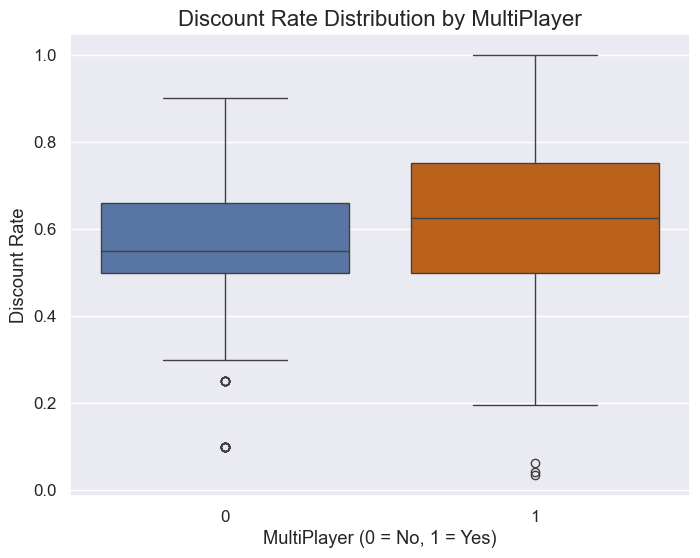

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="MultiPlayer", y="DiscountRate", palette=["#4C72B0", "#D55E00"])
plt.title("Discount Rate Distribution by MultiPlayer", fontsize=16)
plt.xlabel("MultiPlayer (0 = No, 1 = Yes)")
plt.ylabel("Discount Rate")
plt.show()

- 多人遊戲略有更高折扣幅度的傾向。

C:\Users\user\AppData\Local\Temp\ipykernel_24348\367623257.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\user\AppData\Local\Temp\ipykernel_24348\367623257.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


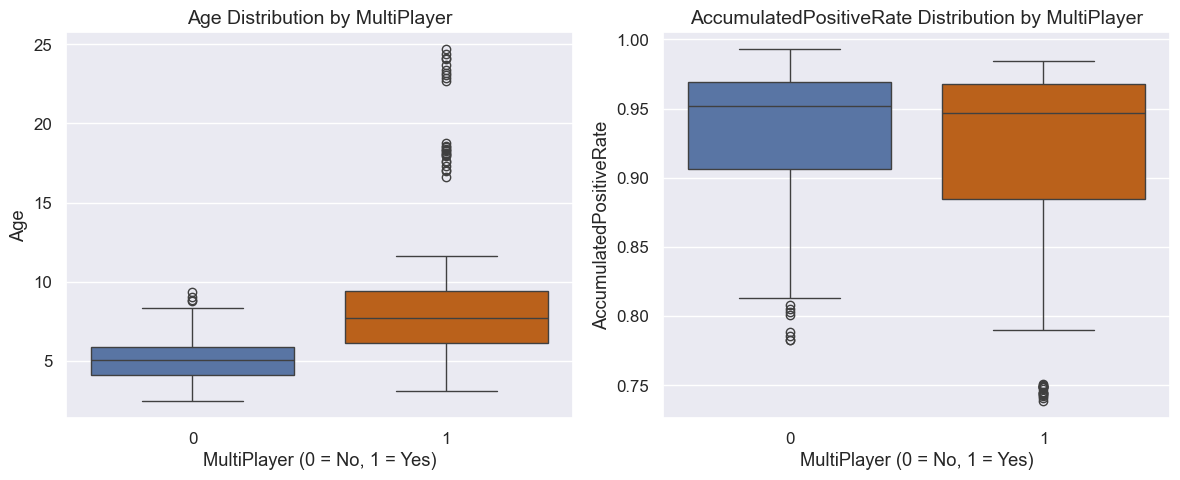

In [50]:
vars_to_compare = ["Age", "AccumulatedPositiveRate"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

# Age
sns.boxplot(
    data=df, x="MultiPlayer", y=vars_to_compare[0],
    palette=["#4C72B0", "#D55E00"], ax=axes[0]
)
axes[0].set_title(f"{vars_to_compare[0]} Distribution by MultiPlayer", fontsize=14)
axes[0].set_xlabel("MultiPlayer (0 = No, 1 = Yes)")
axes[0].set_ylabel(vars_to_compare[0])

# AccumulatedPositiveRate
sns.boxplot(
    data=df, x="MultiPlayer", y=vars_to_compare[1],
    palette=["#4C72B0", "#D55E00"], ax=axes[1]
)
axes[1].set_title(f"{vars_to_compare[1]} Distribution by MultiPlayer", fontsize=14)
axes[1].set_xlabel("MultiPlayer (0 = No, 1 = Yes)")
axes[1].set_ylabel(vars_to_compare[1])

plt.tight_layout()
plt.show()

- 發現多人遊戲較分多人遊戲發行時間較久。


### E. 整體相關性

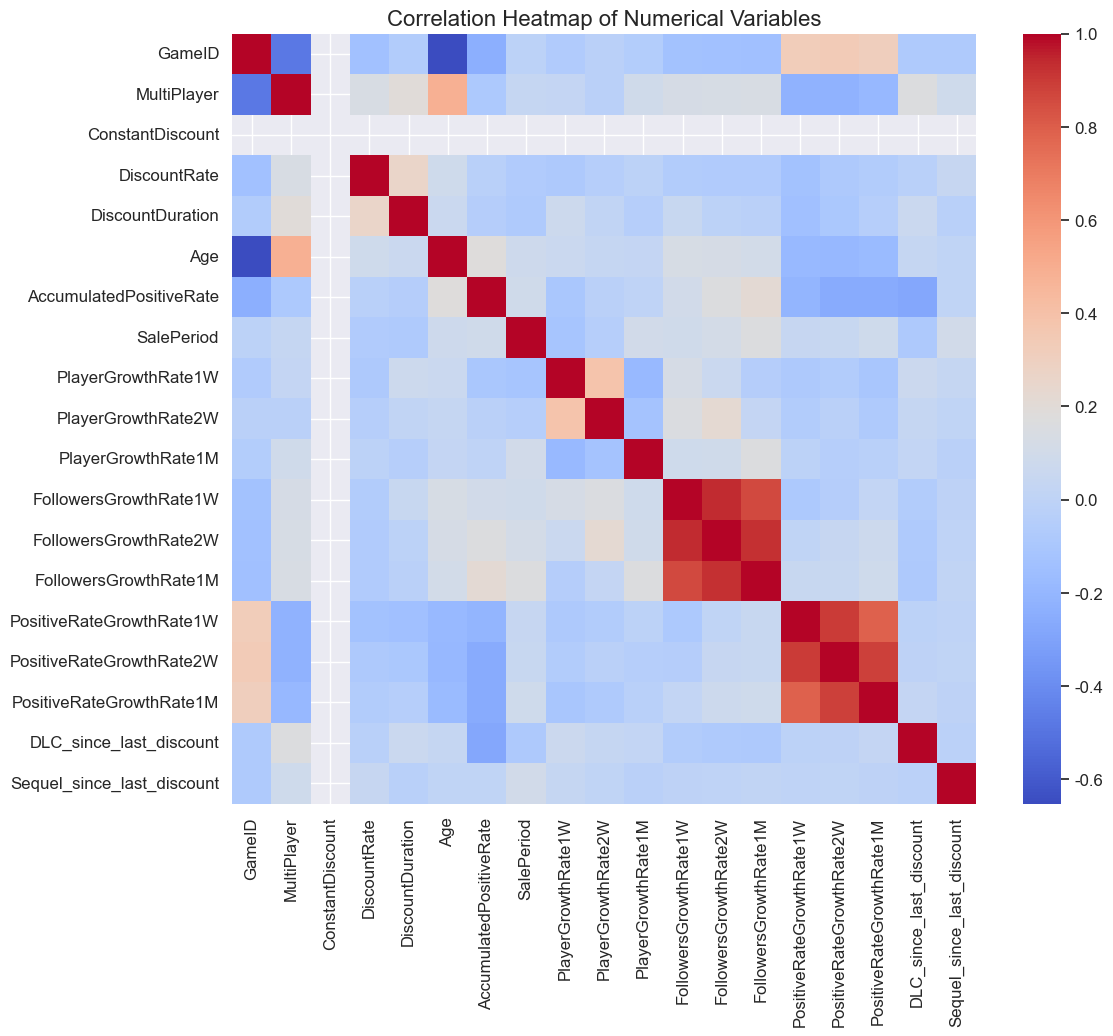

與 DiscountRate 最相關的變數前 8 名：


DiscountDuration              0.258958
MultiPlayer                   0.141019
Age                           0.089769
Sequel_since_last_discount    0.042201
PlayerGrowthRate1M           -0.007559
DLC_since_last_discount      -0.026734
AccumulatedPositiveRate      -0.031029
PlayerGrowthRate2W           -0.039454
Name: DiscountRate, dtype: float64

In [14]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr = df[numeric_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

# 顯示與 DiscountRate 相關最高的前 8 名
top_corr = corr["DiscountRate"].drop("DiscountRate").sort_values(ascending=False)
print("與 DiscountRate 最相關的變數前 8 名：")
display(top_corr.head(8))